Continuamos 

In [2]:
"""
Reconocimiento de patrones: Comprensión de los datos 2
"""

# Figuras en linea
import matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 15)      # Tamaño de las gráficas
import plotly as py
import plotly.graph_objs as go
from IPython.display import display, HTML
from collections import Counter

py.offline.init_notebook_mode(connected=True)

# Dataset

In [3]:
df = pd.read_csv("data/DATA.csv")#cargamos
print("Columnas: {}".format(df.columns))
print("-- "*20)
print("Descripcion: {}".format(df.describe()))
print("-- "*20)
print("Info: {}".format(df.info()))
display(df)

Columnas: Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'duration_min',
       'es_top'],
      dtype='object')
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
Descripcion:        acousticness  danceability   duration_ms        energy  \
count  20700.000000  20700.000000  2.070000e+04  20700.000000   
mean       0.281559      0.636661  2.194849e+05      0.643230   
std        0.274856      0.150655  6.577694e+04      0.194462   
min        0.000003      0.064500  3.141300e+04      0.002620   
25%        0.051400      0.540000  1.887345e+05      0.522000   
50%        0.181000      0.652000  2.135445e+05      0.671000   
75%        0.456000      0.748000  2.431812e+05      0.792000   
max        0.996000      0.983000  3.924548e+06      1.000000   

       instrumentalness           key      liveness      loudness  \
count    

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min,es_top
0,000xQL6tZNLJzIrtIgxqSl,0.13100,0.748,188491,0.627,0.000000,7,0.0852,-6.029,1,0.0644,120.963,4,0.5240,3.141517,1
1,000xYdQfIZ4pDmBGzQalKU,0.68400,0.509,187119,0.803,0.000539,0,0.4630,-6.743,1,0.0400,166.018,4,0.6510,3.118650,1
2,004q4eDxR33ci4f8m4flwl,0.76800,0.838,171627,0.703,0.000002,1,0.0861,-6.195,0,0.0500,104.982,4,0.6580,2.860450,1
3,006pMMCuRo2TFjh8sNGSov,0.88800,0.346,145467,0.433,0.000000,3,0.1010,-10.602,0,0.0650,77.963,3,0.7680,2.424450,0
4,007QSAaELpVxtX5Z6dMn0U,0.04120,0.598,179000,0.950,0.000000,1,0.6640,-3.345,0,0.1000,174.057,4,0.6420,2.983333,0
5,007d7JT41sSc1HqWTs4uw7,0.00304,0.619,218747,0.762,0.000000,0,0.1220,-6.738,0,0.0692,122.916,4,0.3240,3.645783,0
6,009Zz28Vgvnc5FvMXs6dEm,0.39500,0.552,241014,0.578,0.000000,11,0.1460,-9.318,0,0.3360,89.662,4,0.5900,4.016900,1
7,009j4tQyJC53rmgTuXil9E,0.70200,0.548,274960,0.373,0.000003,11,0.1070,-10.504,1,0.0301,114.819,4,0.2470,4.582667,0
8,00BuKLSAFkaEkaVAgIMbeA,0.00587,0.825,220627,0.832,0.000789,5,0.1140,-5.853,0,0.0403,122.021,4,0.7130,3.677117,0
9,00C47repvBYiWwkfE99faH,0.45100,0.470,277310,0.475,0.000000,8,0.1340,-6.730,1,0.0321,123.852,4,0.2090,4.621833,0


# Empezando metodos

## Naive Bayes 

In [11]:
from sklearn.naive_bayes import GaussianNB

df_cut_pure = df[list(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'duration_min'])]
df_cut_class = df[list(['es_top'])]

cut = df_cut_pure.shape[0] // 4 * 3
train_set = df_cut_pure.head(cut).values
train_targets = df_cut_class.head(cut).values.ravel()
test_set = df_cut_pure.tail(df.shape[0]-cut).values
test_targets = df_cut_class.tail(df.shape[0]-cut).values.ravel()

clf = GaussianNB()

clf.fit(train_set, train_targets)
class_predict_train = clf.predict(train_set)
fails_train = np.sum(train_targets  != class_predict_train)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train, len(train_set), 100*fails_train/len(train_set)))

class_predict_test = clf.predict(test_set)
fails_test = np.sum(test_targets  != class_predict_test)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test, len(test_set), 100*fails_test/len(test_set)))

Puntos mal clasificados en el conjunto de entrenamiento: 7360 de 15525 (47.407407407407405%)

Puntos mal clasificados en el conjunto de prueba: 2379 de 5175 (45.971014492753625%)



Noto que los clasifica muy mal, veremos si reduciendo las caracteristicas sale un poco mejor, Bayes es muy rapido, pero no es mejor a tirar una moneda para saber si una cancion es top o no

## Analisis de Componentes Principales

In [19]:
names = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'duration_min']
dfX = df[names]
X = dfX.values

#Estandarización
from sklearn import preprocessing
X_std = preprocessing.StandardScaler().fit_transform(X)

In [20]:
# Impresión fancy
def fancy_display_cov(cov_mat):
    num_cols = cov_mat.shape[0]
    html_str = "<table><tr><th></th>"
    for label in range(num_cols):
        html_str += '<th>' + names[label] + '</th>'
    html_str += '</tr>'
    for label in range(num_cols):
        html_str += '<tr><th>' + names[label] + '</th>'
        for col in range(num_cols):
            html_str += '<th style="font-weight: normal;">' 
            html_str += str(cov_mat[label][col].round(4)) + '</th>'
        html_str += "</tr>"


    html_str += "</table>"
    display(HTML(html_str))

# Matriz de Covarianza
cov_mat = np.cov(X_std.T)

print('Matriz de Covarianza:')
fancy_display_cov(cov_mat)

Matriz de Covarianza:


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
acousticness,1.0,-0.2755,0.0253,-0.6472,0.0391,-0.0192,-0.0681,-0.5114,0.1149,-0.0869,-0.0835,-0.1416,-0.1934,0.0253
danceability,-0.2755,1.0,-0.1552,0.2468,-0.0721,0.0162,-0.0813,0.2254,-0.1397,0.2221,-0.0995,0.1579,0.397,-0.1552
duration_ms,0.0253,-0.1552,1.0,-0.0277,0.0446,0.0103,-0.0056,-0.0211,0.0256,-0.0958,0.0026,0.0193,-0.1325,1.0
energy,-0.6472,0.2468,-0.0277,1.0,-0.0526,0.0319,0.1632,0.7551,-0.1377,0.1186,0.0984,0.1593,0.4183,-0.0277
instrumentalness,0.0391,-0.0721,0.0446,-0.0526,1.0,-0.005,-0.0104,-0.1726,0.0113,-0.072,-0.016,-0.0105,-0.0772,0.0446
key,-0.0192,0.0162,0.0103,0.0319,-0.005,1.0,-0.0016,0.0163,-0.1583,0.0277,-0.0038,0.0116,0.0379,0.0103
liveness,-0.0681,-0.0813,-0.0056,0.1632,-0.0104,-0.0016,1.0,0.0889,0.0042,0.0586,0.0256,-0.003,0.0471,-0.0056
loudness,-0.5114,0.2254,-0.0211,0.7551,-0.1726,0.0163,0.0889,1.0,-0.0922,0.0123,0.0828,0.1498,0.2742,-0.0211
mode,0.1149,-0.1397,0.0256,-0.1377,0.0113,-0.1583,0.0042,-0.0922,1.0,-0.1226,0.0088,-0.0489,-0.0695,0.0256
speechiness,-0.0869,0.2221,-0.0958,0.1186,-0.072,0.0277,0.0586,0.0123,-0.1226,1.0,0.0473,0.0376,0.0491,-0.0958


In [26]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)

labels = []
print('\nEigenvalues')
for i in range(len(names)):
    labels.append("var" + str(i))
    print(labels[i],"\t", end="")
print()
for label in range(len(names)):
    print(eig_vals[label].round(4),"\t", end="")
print()

Eigenvectors 
[[-4.22055862e-01  1.72067584e-01 -2.62214940e-01 -6.12110548e-01
   4.15243966e-01  1.16768029e-01 -2.32152075e-01  4.58219370e-03
   2.81294106e-01  1.30040421e-01  3.93965822e-02 -9.80249593e-02
  -4.06180160e-02 -2.75196493e-17]
 [ 3.23776721e-01  9.12167399e-02 -1.21277301e-01 -3.76859919e-01
  -6.04137650e-01  4.24937961e-01 -2.69862440e-03  2.99102283e-01
   1.32925447e-01  1.34682894e-01  2.27604170e-01  2.89494902e-02
   8.14993395e-02  1.84577609e-18]
 [-1.72719229e-01 -6.55737867e-01  6.62862017e-03 -1.58434801e-03
  -1.40436830e-02  1.32681906e-01 -1.23777249e-02  3.49004266e-02
   3.65575033e-02  1.03920361e-01  9.23363552e-02 -1.12220903e-02
   1.29875937e-02 -7.07106781e-01]
 [ 5.01366895e-01 -1.98381259e-01 -7.67476419e-01 -2.90004370e-02
   2.44243315e-01 -1.73051787e-01  7.91388241e-02 -3.59825390e-02
  -9.23420794e-02 -1.04575355e-01  4.22521262e-02 -2.70530506e-02
   1.65965494e-02 -2.03294390e-16]
 [-1.08132010e-01 -2.06886368e-02  8.83566741e-02 -1.3

[20.41885374415328,
 14.462639165854632,
 1.250016757187305,
 3.140531617023782,
 3.990910262400227,
 8.892054473342142,
 5.621580778429945,
 7.967564409482765,
 6.178923942163045,
 7.363018665190648,
 6.697677091610821,
 6.949670533976746,
 7.066558559184665,
 -3.1242122323743466e-15]

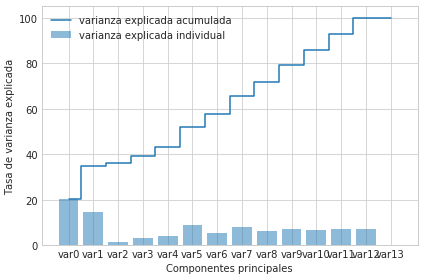

In [27]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)
display(var_exp)

x = range(len(names))
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.xticks(x, labels)

    plt.bar(x, var_exp, alpha=0.5, align='center', label='varianza explicada individual')
    plt.step(x, cum_var_exp, where='mid', label='varianza explicada acumulada')
    plt.ylabel('Tasa de varianza explicada')
    plt.xlabel('Componentes principales')
    plt.legend(loc='best')
    plt.tight_layout()

En esta grafica podemos ver que las var2, var3 y var4 son las menos significativas, se seguiran considerando en las siguientes secciones. var13 fue una generada por curiosidad en la libreta `Spotify_Worldwide_Analysis`. var2 es la menos significante. La cual nos dice lo que dura una cancion, probando que si funciona este metodo para ver como se comportan los datos


Eigenvalues
var0 	var1 	var2 	var3 	var4 	var5 	var6 	var7 	var8 	var9 	var10 	var11 	
2.8068 	0.1752 	0.4397 	0.5593 	1.2791 	0.7874 	1.1182 	0.8672 	1.0532 	0.9897 	0.9733 	0.9516 	


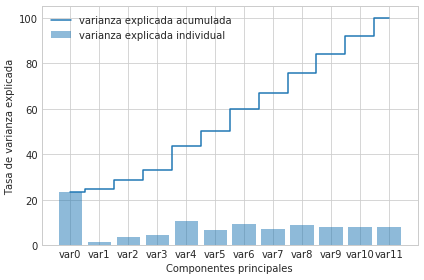

In [33]:
new_names = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']
dfX2 = dfX[new_names]
# duration_ms, duration_min # solo descartamos
X2 = dfX2.values

X_std2 = preprocessing.StandardScaler().fit_transform(X2)
cov_mat2 = np.cov(X_std2.T)
eig_vals2, eig_vecs2 = np.linalg.eig(cov_mat2)

print('\nEigenvalues')
for i in range(len(new_names)):
    print("var" + str(i),"\t", end="")
print()
for label in range(len(new_names)):
    print(eig_vals2[label].round(4),"\t", end="")
print()

tot = sum(eig_vals2)
var_exp = [(i / tot)*100 for i in eig_vals2]
cum_var_exp = np.cumsum(var_exp)

x = range(len(new_names))
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.xticks(x, labels)
    #print("x: {}".format(x))
    plt.bar(x, var_exp, alpha=0.5, align='center', label='varianza explicada individual')
    plt.step(x, cum_var_exp, where='mid', label='varianza explicada acumulada')
    plt.ylabel('Tasa de varianza explicada')
    plt.xlabel('Componentes principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [34]:
# Crear duplas (eigenvalue, eigenvector) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos la lista de mayor a menor
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Parejas en orden descendiente por eigenvalor:')
for i in eig_pairs:
    print(i[0], "\t", i[1])

Parejas en orden descendiente por eigenvalor:
2.8587776293809473 	 [-0.42205586  0.32377672 -0.17271923  0.50136689 -0.10813201  0.04019834
  0.08176517  0.45041678 -0.14436074  0.14165565  0.05831886  0.15326038
  0.33961658 -0.17271923]
2.0248673028961175 	 [ 0.17206758  0.09121674 -0.65573787 -0.19838126 -0.02068864 -0.02280114
 -0.05382994 -0.19454339  0.01134937  0.09475905 -0.05507903 -0.08788809
  0.03426403 -0.65573787]
1.244947768672184 	 [ 0.11676803  0.42493796  0.13268191 -0.17305179  0.0039827   0.35303724
 -0.32537514 -0.21104157 -0.45228355  0.31572737 -0.34109919  0.18818207
  0.09784195  0.13268191]
1.1155129068399952 	 [ 0.00458219  0.29910228  0.03490043 -0.03598254  0.00119409 -0.50195072
 -0.3875275   0.03180549  0.41972002 -0.29050621 -0.39369789  0.23507172
  0.18117781  0.03490043]
1.0308724137263878 	 [ 0.13004042  0.13468289  0.10392036 -0.10457535 -0.67082036 -0.33203535
  0.09781736 -0.05596325  0.15936632  0.53978957  0.17415624 -0.1069106
  0.0306088   0.1

In [37]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(len(names),1),
                      eig_pairs[1][1].reshape(len(names),1),
                      eig_pairs[2][1].reshape(len(names),1),
                      eig_pairs[3][1].reshape(len(names),1),
                      eig_pairs[4][1].reshape(len(names),1),
                      eig_pairs[5][1].reshape(len(names),1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.42205586  0.17206758  0.11676803  0.00458219  0.13004042 -0.04061802]
 [ 0.32377672  0.09121674  0.42493796  0.29910228  0.13468289  0.08149934]
 [-0.17271923 -0.65573787  0.13268191  0.03490043  0.10392036  0.01298759]
 [ 0.50136689 -0.19838126 -0.17305179 -0.03598254 -0.10457535  0.01659655]
 [-0.10813201 -0.02068864  0.0039827   0.00119409 -0.67082036  0.52864149]
 [ 0.04019834 -0.02280114  0.35303724 -0.50195072 -0.33203535 -0.34982571]
 [ 0.08176517 -0.05382994 -0.32537514 -0.3875275   0.09781736  0.49988129]
 [ 0.45041678 -0.19454339 -0.21104157  0.03180549 -0.05596325 -0.15831609]
 [-0.14436074  0.01134937 -0.45228355  0.41972002  0.15936632  0.02968224]
 [ 0.14165565  0.09475905  0.31572737 -0.29050621  0.53978957  0.42978911]
 [ 0.05831886 -0.05507903 -0.34109919 -0.39369789  0.17415624 -0.15370265]
 [ 0.15326038 -0.08788809  0.18818207  0.23507172 -0.1069106   0.30238108]
 [ 0.33961658  0.03426403  0.09784195  0.18117781  0.0306088  -0.1168399 ]
 [-0.17271923 

In [39]:
X = X_std.dot(matrix_w)

In [43]:
df_cut_pure = df[list(['acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'])]
df_cut_class = df[list(['es_top'])]

cut = dfPID_cut_pure.shape[0] // 4 * 3
train_set = dfPID_cut_pure.head(cut).values
train_targets = dfPID_cut_class.head(cut).values.ravel()
test_set = dfPID_cut_pure.tail(dfX.shape[0]-cut).values
test_targets = dfPID_cut_class.tail(dfX.shape[0]-cut).values.ravel()

clf = GaussianNB()

clf.fit(train_set, train_targets)
class_predict_train = clf.predict(train_set)
fails_train = np.sum(train_targets  != class_predict_train)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train, len(train_set), 100*fails_train/len(train_set)))

class_predict_test = clf.predict(test_set)
fails_test = np.sum(test_targets  != class_predict_test)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test, len(test_set), 100*fails_test/len(test_set)))

Puntos mal clasificados en el conjunto de entrenamiento: 7360 de 15525 (47.407407407407405%)

Puntos mal clasificados en el conjunto de prueba: 2379 de 5175 (45.971014492753625%)



In [44]:
train_set = X[:cut]
test_set = X[cut:]

clf = GaussianNB()

clf.fit(train_set, train_targets)
class_predict_train = clf.predict(train_set)
fails_train = np.sum(train_targets  != class_predict_train)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train, len(train_set), 100*fails_train/len(train_set)))

class_predict_test = clf.predict(test_set)
fails_test = np.sum(test_targets  != class_predict_test)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)"
      .format(fails_test, len(test_set), 100*fails_test/len(test_set)))

Puntos mal clasificados en el conjunto de entrenamiento: 7270 de 15525 (46.82769726247987%)

Puntos mal clasificados en el conjunto de prueba: 2355 de 5175 (45.507246376811594%)


De este analisis, puedo decir que me faltan datos para empezar a entrenar mas chido.

## Clustering

### Dendogramas

In [7]:
names = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'es_top']

dataset = df[names]

display(X.head(10))

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,es_top
0,0.13100,0.748,0.627,0.000000,7,0.0852,-6.029,1,0.0644,120.963,4,0.524,1
1,0.68400,0.509,0.803,0.000539,0,0.4630,-6.743,1,0.0400,166.018,4,0.651,1
2,0.76800,0.838,0.703,0.000002,1,0.0861,-6.195,0,0.0500,104.982,4,0.658,1
3,0.88800,0.346,0.433,0.000000,3,0.1010,-10.602,0,0.0650,77.963,3,0.768,0
4,0.04120,0.598,0.950,0.000000,1,0.6640,-3.345,0,0.1000,174.057,4,0.642,0
5,0.00304,0.619,0.762,0.000000,0,0.1220,-6.738,0,0.0692,122.916,4,0.324,0
6,0.39500,0.552,0.578,0.000000,11,0.1460,-9.318,0,0.3360,89.662,4,0.590,1
7,0.70200,0.548,0.373,0.000003,11,0.1070,-10.504,1,0.0301,114.819,4,0.247,0
8,0.00587,0.825,0.832,0.000789,5,0.1140,-5.853,0,0.0403,122.021,4,0.713,0
9,0.45100,0.470,0.475,0.000000,8,0.1340,-6.730,1,0.0321,123.852,4,0.209,0


In [51]:
from scipy.spatial import distance
np.set_printoptions(precision=1, suppress=True) # Cortar la impresión de decimales a 1

# Convertir el vector de distancias a una matriz cuadrada
md = distance.squareform(distance.pdist(X, 'euclidean')) 
print(md)

print(distance.pdist(X, 'euclidean'))

[[ 0.  45.6 17.1 43.5 53.5  7.4 31.7  8.7  2.7  3.3]
 [45.6  0.  61.1 88.2  8.9 43.1 77.2 52.5 44.3 42.9]
 [17.1 61.1  0.  27.5 69.1 18.  18.6 14.8 17.6 20.2]
 [43.5 88.2 27.5  0.  96.4 45.2 14.3 37.7 44.4 46.3]
 [53.5  8.9 69.1 96.4  0.  51.3 85.2 60.5 52.3 50.8]
 [ 7.4 43.1 18.  45.2 51.3  0.  35.1 14.2  5.2  8.1]
 [31.7 77.2 18.6 14.3 85.2 35.1  0.  25.2 33.1 34.5]
 [ 8.7 52.5 14.8 37.7 60.5 14.2 25.2  0.  10.6 10.2]
 [ 2.7 44.3 17.6 44.4 52.3  5.2 33.1 10.6  0.   3.9]
 [ 3.3 42.9 20.2 46.3 50.8  8.1 34.5 10.2  3.9  0. ]]
[45.6 17.1 43.5 53.5  7.4 31.7  8.7  2.7  3.3 61.1 88.2  8.9 43.1 77.2
 52.5 44.3 42.9 27.5 69.1 18.  18.6 14.8 17.6 20.2 96.4 45.2 14.3 37.7
 44.4 46.3 51.3 85.2 60.5 52.3 50.8 35.1 14.2  5.2  8.1 25.2 33.1 34.5
 10.6 10.2  3.9]


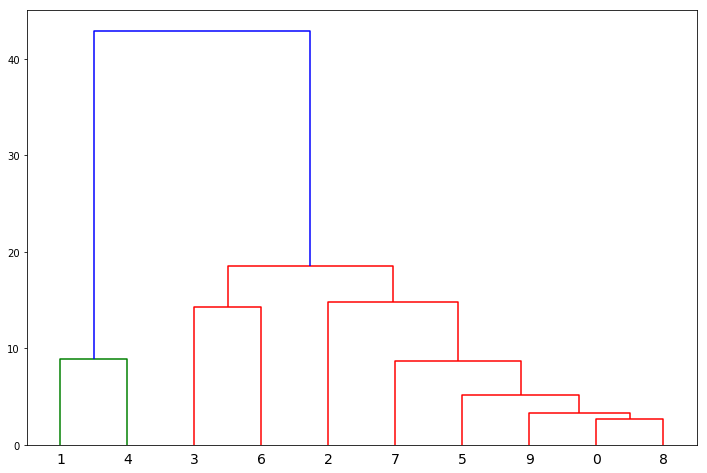

In [52]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

Z = linkage(X, 'single')
plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_font_size=14)
plt.show()

In [56]:
names = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'es_top']

X = df[names]

Z = linkage(X, 'single')

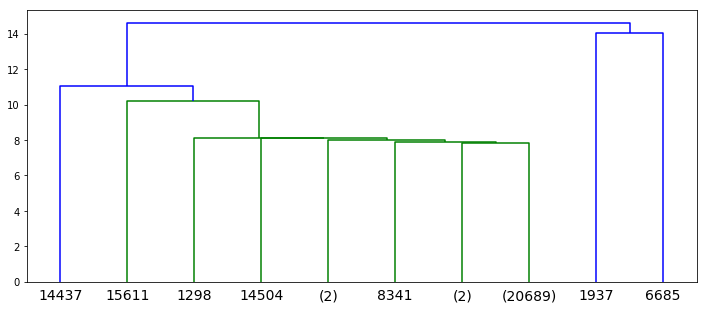

In [55]:
plt.figure(figsize=(12, 5))
dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=10,                   
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()

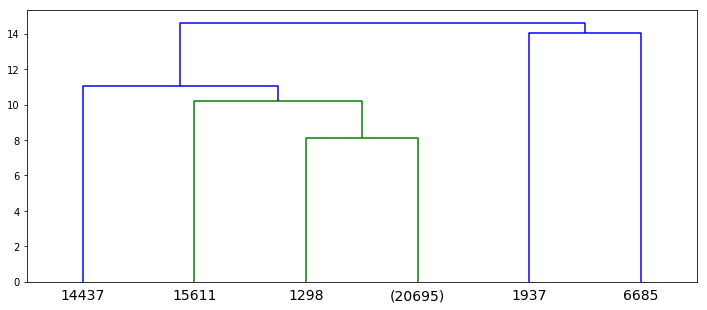

In [59]:
plt.figure(figsize=(12, 5))
dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=6,                   # 6 grupos
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()

### K-Medias

In [138]:
names = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']
X = df[names]
Y = list(df['es_top'])
print(X.head(10))
print(Y[:10])

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0       0.13100         0.748   0.627          0.000000    7    0.0852   
1       0.68400         0.509   0.803          0.000539    0    0.4630   
2       0.76800         0.838   0.703          0.000002    1    0.0861   
3       0.88800         0.346   0.433          0.000000    3    0.1010   
4       0.04120         0.598   0.950          0.000000    1    0.6640   
5       0.00304         0.619   0.762          0.000000    0    0.1220   
6       0.39500         0.552   0.578          0.000000   11    0.1460   
7       0.70200         0.548   0.373          0.000003   11    0.1070   
8       0.00587         0.825   0.832          0.000789    5    0.1140   
9       0.45100         0.470   0.475          0.000000    8    0.1340   

   loudness  mode  speechiness    tempo  time_signature  valence  
0    -6.029     1       0.0644  120.963               4    0.524  
1    -6.743     1       0.0400  166.018            

In [107]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X) 

print(k_means.cluster_centers_)
print("Score: {}".format(k_means.score(X)))

[[  0.27   0.62   0.64   0.01   5.19   0.18  -6.84   0.62   0.11 144.92
    3.95   0.48]
 [  0.38   0.57   0.56   0.02   5.21   0.17  -7.83   0.64   0.12  83.03
    3.91   0.45]
 [  0.26   0.68   0.66   0.02   5.3    0.18  -6.75   0.58   0.09 123.91
    3.98   0.5 ]
 [  0.27   0.52   0.66   0.01   5.34   0.19  -6.6    0.63   0.14 177.29
    3.88   0.53]
 [  0.26   0.68   0.67   0.01   5.45   0.18  -6.58   0.57   0.1  102.17
    3.96   0.54]]
Score: -1472336.9110606918


## Visualizacion de datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39566bfb70>,
      dtype=object)

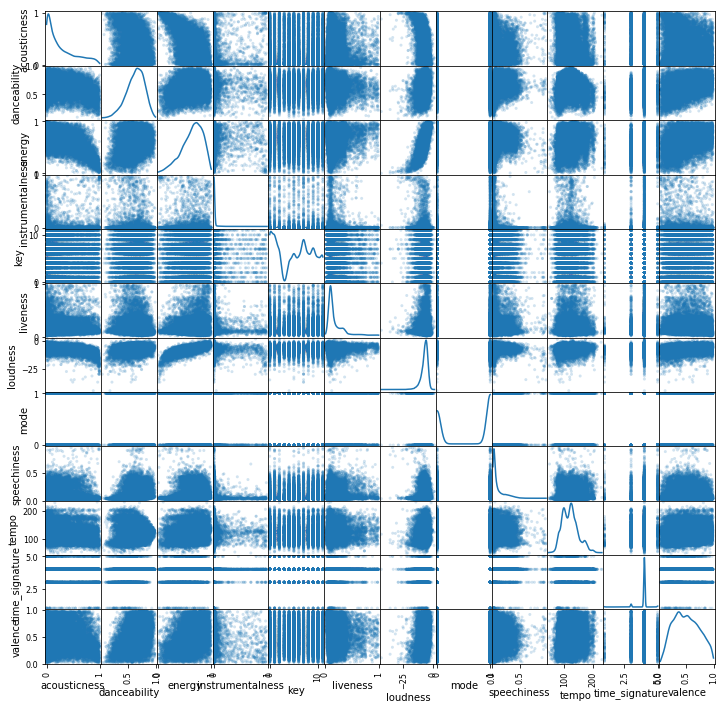

In [110]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha=0.2, figsize=(12, 12), diagonal='kde')

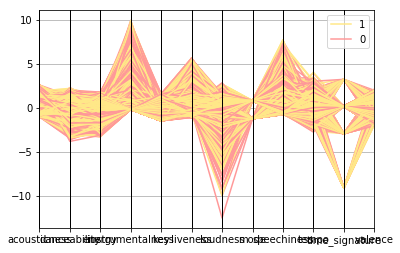

In [116]:
# Scaling attribute values to avoid few outiers
names = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']
subset_df = df[names]

# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# scaled_df = ss.fit_transform(subset_df)
# scaled_df = pd.DataFrame(scaled_df, columns=names)
final_df = pd.concat([scaled_df, df['es_top']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'es_top', color=('#FFE888', '#FF9999'))

## t-SNE

In [111]:
from sklearn.manifold import TSNE

n_sne = 7000

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20700 samples in 0.016s...
[t-SNE] Computed neighbors for 20700 samples in 0.935s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20700
[t-SNE] Computed conditional probabilities for sample 2000 / 20700
[t-SNE] Computed conditional probabilities for sample 3000 / 20700
[t-SNE] Computed conditional probabilities for sample 4000 / 20700
[t-SNE] Computed conditional probabilities for sample 5000 / 20700
[t-SNE] Computed conditional probabilities for sample 6000 / 20700
[t-SNE] Computed conditional probabilities for sample 7000 / 20700
[t-SNE] Computed conditional probabilities for sample 8000 / 20700
[t-SNE] Computed conditional probabilities for sample 9000 / 20700
[t-SNE] Computed conditional probabilities for sample 10000 / 20700
[t-SNE] Computed conditional probabilities for sample 11000 / 20700
[t-SNE] Computed conditional probabilities for sample 12000 / 20700
[t-SNE] Computed conditional probabilities for sa

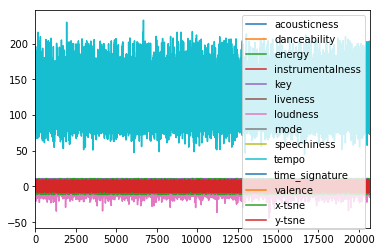

In [113]:
df_tsne = X.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

df_tsne.plot()

## Comparando metodos de clustering

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=.25, hspace=.25)

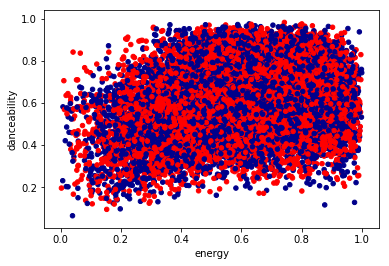

In [140]:
X.plot.scatter(x="energy",y='danceability',c=['DarkBlue','Red'])

Se puede ver que hay muchos gustos de energia y que tan bailables son las canciones,

# Clasificacion 1

In [9]:
# Inicializar el ambiente
import math
import sys

from scipy.spatial import distance
from sklearn import cluster
from matplotlib import pyplot as plt
%matplotlib inline
np.set_printoptions(precision=2, suppress=True) # Cortar la impresión de decimales a 1

Datos de entrenamiento: 
[[  0.13   0.75   0.63 ... 120.96   4.     0.52]
 [  0.68   0.51   0.8  ... 166.02   4.     0.65]
 [  0.77   0.84   0.7  ... 104.98   4.     0.66]
 ...
 [  0.1    0.75   0.72 ... 154.97   4.     0.35]
 [  0.15   0.51   0.87 ... 162.13   4.     0.77]
 [  0.73   0.42   0.36 ... 130.58   4.     0.29]]

Dato de prueba:
[[ 0.01  0.79  0.62  0.    8.    0.15 -6.67  1.    0.25 78.48  4.    0.48]]

Prototipos de clase (centroides):
 [[  0.27   0.67   0.65   0.02   5.28   0.18  -6.8    0.59   0.1  127.96
    3.98   0.49]
 [  0.3    0.63   0.63   0.02   5.36   0.18  -7.04   0.6    0.11  94.29
    3.94   0.5 ]
 [  0.26   0.56   0.66   0.01   5.26   0.19  -6.64   0.63   0.13 167.76
    3.9    0.52]]


IndexError: index 1 is out of bounds for axis 0 with size 1

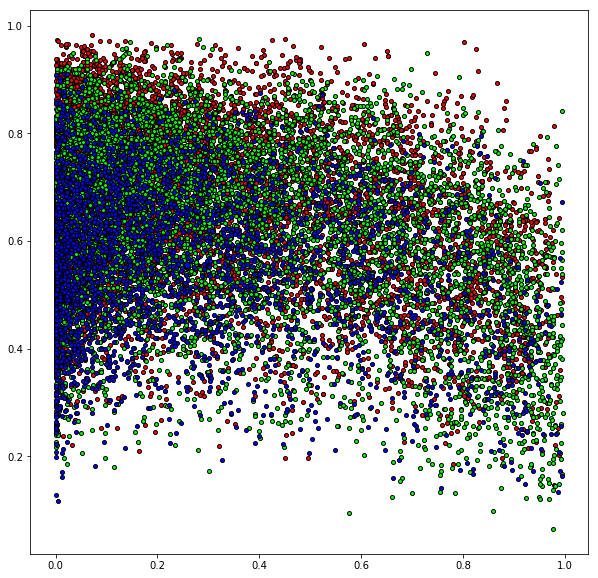

In [28]:
# Leer los datos de archivo, separar training y test y calcular "prototipos de clase"
names = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']
train_set = dataset[names].values
rand_int = np.random.randint(len(train_set), size=1)
test_point = train_set[rand_int]
print("Datos de entrenamiento: \n{}\n\nDato de prueba:\n{}\n".format(train_set, test_point))

num_clusters = 3
k_means = cluster.KMeans(n_clusters=num_clusters, init='random')
k_means.fit(train_set)
print("Prototipos de clase (centroides):\n", k_means.cluster_centers_)

fig = plt.figure(figsize=(10, 10))
colors = ['#ff0000', '#00ff00', '#0000ff']
for k in range(num_clusters):
    my_members = k_means.labels_ == k
    plt.plot(train_set[my_members, 0], train_set[my_members, 1], 'o', 
             markeredgecolor='k', markerfacecolor=colors[k], markersize=4)
    plt.plot(k_means.cluster_centers_[k][0], k_means.cluster_centers_[k][1], 'o', 
             markeredgecolor='k', markerfacecolor=colors[k], markersize=6)
plt.annotate('Punto nuevo', xy=(test_point[0], test_point[1]), xytext=(40, 50),
          arrowprops=dict(facecolor='black', shrink=0.1, width=1, headwidth=7))

plt.plot(test_point[0], test_point[1], 'b', marker='*', markersize=8)
plt.xlim([-10,110])
plt.ylim([-10,100])
plt.show()

Tenemos estos clusters, me falta ver mejores formas de visualizacion.

In [22]:
LARGER_DISTANCE = sys.maxsize

k_neighs = 5 # 5 vecinos... aunque tomaremos sólo el más cercano
neighbors_dists = [LARGER_DISTANCE] * k_neighs
neighbors = [0] * k_neighs
for i in range(len(train_set)):
    dist = distance.euclidean(train_set[i], test_point)
    for k in range(k_neighs):
        if (dist < neighbors_dists[k]) :
            for j in range(k_neighs-1, k, -1):
                neighbors_dists[j] = neighbors_dists[j-1]
                neighbors[j] = neighbors[j-1] 
            neighbors_dists[k] = dist
            neighbors[k] = i
            break
            
print("Los {} vecinos más próximos son:".format(k_neighs))
for k in range(k_neighs):
    clase = k_means.labels_[neighbors[k]]
    print("Vecino {}: {}, dist={}, clase={}, centroide={}"
          .format(k, neighbors[k], neighbors_dists[k], 
                  clase, k_means.cluster_centers_[clase]))
print("\nEl nuevo punto es asignado a la clase", k_means.labels_[neighbors[0]])

Los 5 vecinos más próximos son:
Vecino 0: 0, dist=0.0, clase=2, centroide=[  0.27   0.67   0.65   0.02   5.28   0.18  -6.8    0.59   0.1  127.95
   3.98   0.49]
Vecino 1: 19050, dist=0.7082863968762859, clase=2, centroide=[  0.27   0.67   0.65   0.02   5.28   0.18  -6.8    0.59   0.1  127.95
   3.98   0.49]
Vecino 2: 15447, dist=0.9452806469699806, clase=2, centroide=[  0.27   0.67   0.65   0.02   5.28   0.18  -6.8    0.59   0.1  127.95
   3.98   0.49]
Vecino 3: 6782, dist=0.98081635895819, clase=2, centroide=[  0.27   0.67   0.65   0.02   5.28   0.18  -6.8    0.59   0.1  127.95
   3.98   0.49]
Vecino 4: 2514, dist=0.9919521409826146, clase=2, centroide=[  0.27   0.67   0.65   0.02   5.28   0.18  -6.8    0.59   0.1  127.95
   3.98   0.49]

El nuevo punto es asignado a la clase 2


In [29]:
for i in range(num_clusters):
    dist = distance.euclidean(k_means.cluster_centers_[i], test_point)
    print ("Distancia del punto de prueba al prototipo de la clase {}: {}".format(i, dist))

Distancia del punto de prueba al prototipo de la clase 0: 49.556889862372245
Distancia del punto de prueba al prototipo de la clase 1: 16.049428539121582
Distancia del punto de prueba al prototipo de la clase 2: 89.33206401507637


In [30]:
simple_vote = [0] * num_clusters
winner = 0 
for k in range(k_neighs):
    # Obtener la clase del vecino k
    clase = k_means.labels_[neighbors[k]]
    simple_vote[clase] += 1
winner = simple_vote.index(max(simple_vote))
print("Votación simple:\nEl nuevo punto es asignado a la clase {} con {} vecinos cercanos.\n"
      .format(winner, simple_vote[winner]))

print("Los {} vecinos más próximos y sus pesos ponderados son:".format(k_neighs))
suma_dists = sum(neighbors_dists)
neighbors_weights = [0] * k_neighs
weighted_vote = [0] * num_clusters
winner = 0 

for k in range(k_neighs):
    neighbors_weights[k] = 1 - neighbors_dists[k] / suma_dists
    clase = k_means.labels_[neighbors[k]]
    weighted_vote[clase] += neighbors_weights[k]
    print("Vecino {}: peso={}, clase: {}"
          .format(k, neighbors_weights[k], k_means.labels_[neighbors[k]]))
for k in range(num_clusters):
    if (simple_vote[k] == max(simple_vote)):
        winner = k
print("\nVotación ponderada:")
print("El nuevo punto es asignado a la clase {} con una votación de {}."
      .format(winner, weighted_vote[winner]))

Votación simple:
El nuevo punto es asignado a la clase 0 con 5 vecinos cercanos.

Los 5 vecinos más próximos y sus pesos ponderados son:
Vecino 0: peso=1.0, clase: 0
Vecino 1: peso=0.8046826091176866, clase: 0
Vecino 2: peso=0.7393289629280138, clase: 0
Vecino 3: peso=0.7295296182289024, clase: 0
Vecino 4: peso=0.7264588097253971, clase: 0

Votación ponderada:
El nuevo punto es asignado a la clase 0 con una votación de 4.0.


## Clasificacionn 3
naive bayes

In [31]:
# Inicializar el ambiente
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import cluster # Auxiliar

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
np.set_printoptions(precision=2, suppress=True) # Cortar la impresión de decimales a 1

In [38]:
X, y = dataset[names], dataset['es_top']

In [40]:
#Los datos en un dataframe
print("Los datos en un dataframe\n{}\n"
      .format(X.head(10)))

#Los datos como una matriz
print("Los datos como una matriz\n{}\n...incluso para la lista de valores objetivo\n{}\n"
      .format(X.head(10).values, y.head(10).values))

#Los datos como una lista con los valores de los renglones apilados
print("Los datos como una lista con los valores de los renglones apilados\n{}\n... y\n{}"
      .format(X.head(10).values.ravel(), y.head(10).values.ravel()))

Los datos en un dataframe
   acousticness  danceability  energy  instrumentalness  key  liveness  \
0       0.13100         0.748   0.627          0.000000    7    0.0852   
1       0.68400         0.509   0.803          0.000539    0    0.4630   
2       0.76800         0.838   0.703          0.000002    1    0.0861   
3       0.88800         0.346   0.433          0.000000    3    0.1010   
4       0.04120         0.598   0.950          0.000000    1    0.6640   
5       0.00304         0.619   0.762          0.000000    0    0.1220   
6       0.39500         0.552   0.578          0.000000   11    0.1460   
7       0.70200         0.548   0.373          0.000003   11    0.1070   
8       0.00587         0.825   0.832          0.000789    5    0.1140   
9       0.45100         0.470   0.475          0.000000    8    0.1340   

   loudness  mode  speechiness    tempo  time_signature  valence  
0    -6.029     1       0.0644  120.963               4    0.524  
1    -6.743     1       0

In [41]:
train_set, test_set, train_targets, test_targets = train_test_split(
    X, y, test_size=0.33, random_state=0)

In [42]:
complete_set = X.values #X 
complete_targets = y.values.ravel() #y

In [43]:
clf = GaussianNB()
clf.fit(complete_set, complete_targets)
class_complete = clf.predict(complete_set)
fails_complete = np.sum(complete_targets  != class_complete)
print("Puntos mal clasificados en el conjunto completo: {} de {} ({}%)\n"
      .format(fails_complete, len(complete_set), 100*fails_complete/len(complete_set)))

clf.fit(train_set, train_targets)
class_predict_train = clf.predict(train_set)
fails_train = np.sum(train_targets  != class_predict_train)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train, len(train_set), 100*fails_train/len(train_set)))

class_predict_test = clf.predict(test_set)
fails_test = np.sum(test_targets  != class_predict_test)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)"
      .format(fails_test, len(test_set), 100*fails_test/len(test_set)))

print("\nMatriz de confusión\n", confusion_matrix(test_targets, class_predict_test))

Puntos mal clasificados en el conjunto completo: 9580 de 20700 (46.28019323671498%)

Puntos mal clasificados en el conjunto de entrenamiento: 6411 de 13869 (46.22539476530392%)

Puntos mal clasificados en el conjunto de prueba: 3204 de 6831 (46.9038208168643%)

Matriz de confusión
 [[ 667 2567]
 [ 637 2960]]


Primeros 5 vectores:
 [[0.13 0.75 0.63 0.   0.09 0.06 0.52 1.  ]
 [0.68 0.51 0.8  0.   0.46 0.04 0.65 1.  ]
 [0.77 0.84 0.7  0.   0.09 0.05 0.66 1.  ]
 [0.89 0.35 0.43 0.   0.1  0.07 0.77 0.  ]
 [0.04 0.6  0.95 0.   0.66 0.1  0.64 0.  ]]


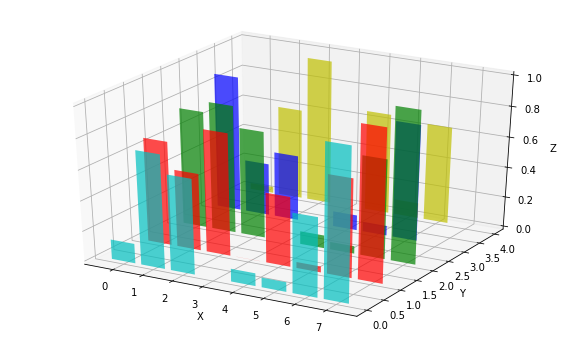

Resultados del entrenamiento (muestras por clase)
[10893.  9807.]

Vectores de prueba
[[ 1 10  7 14  1  9  7  3]
 [ 7  9  2  2  9  1 13 12]
 [10 12  8  7  5 13 14  6]
 [ 5 11  7  0 11  1  2 11]
 [13  1 11 10  4 12 12 13]]

Clase por vector de prueba
[0 0 0 0 0]

Tabla de probabilidades
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

Clasificación esperada de los 5 primeros datos de etrenamiento
[0 0 0 1 1]

Tabla de probabilidades para datos de entrenamiento
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.28 0.72]
 [0.26 0.74]]


In [49]:
names = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness',
       'speechiness', 'valence','es_top']
num_features = len(names)
num_vectors = len(dataset)
num_clases = 2

data_array = dataset[names].values
print("Primeros 5 vectores:\n", data_array[:5])

x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
colors = ['c', 'r', 'g', 'b', 'y']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(4, -1, -1): 
    cs = colors[i % len(colors)] * num_features
    ax.bar(x_data[i], data_array[i], zs=y_data[i], zdir='y', color=cs, alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

#
k_means = cluster.KMeans(n_clusters=num_clases, init='random')
k_means.fit(data_array) 
y = k_means.fit_predict(data_array)
#

clfM = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)
clfM.fit(data_array, y)
print("Resultados del entrenamiento (muestras por clase)\n{}\n".format(clfM.class_count_))

test_data_array = np.random.randint(15, size=(5, num_features))
print("Vectores de prueba\n{}\n\nClase por vector de prueba\n{}\n"
      .format(test_data_array, clfM.predict(test_data_array)))
print("Tabla de probabilidades\n{}\n".format(clfM.predict_proba(test_data_array)))

print("Clasificación esperada de los 5 primeros datos de etrenamiento\n{}\n"
      .format(y[0:5]))
print("Tabla de probabilidades para datos de entrenamiento\n{}"
      .format(clfM.predict_proba(data_array[0:5])))


## Arboles de Decision

In [52]:
from IPython.display import Image, display  

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [56]:
names = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']
train_features, test_features, train_targets, test_targets = train_test_split(
    dataset[names].values, dataset['es_top'].values.ravel(), test_size=0.1)

clf = tree.DecisionTreeClassifier() # Gini, por default
clf = clf.fit(train_features, train_targets)

test_targets = list(test_targets)
train_targets = list(train_targets)

print ("Clases de la muestra de prueba: ", test_targets[:10])

Clases de la muestra de prueba:  [1, 0, 1, 0, 0, 1, 1, 1, 1, 1]
